In [29]:
import pandas as pd
import numpy as np
import os
import xlrd
import openpyxl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\huyho\\OneDrive\\Desktop\\student-c'

In [31]:
os.getcwd()
path = 'c:\\Users\\huyho\\OneDrive\\Desktop\\student-c\\RFEP Worksheet Fall20-21 Sample.xlsx'

In [32]:
el_monitoring_df = pd.read_csv('elmonitoring.csv')
el_monitoring_df.head()

,Student ID,Last Name,First Name,Middle Name,Current Grade Level,Internal Student ID,Date Entered,Oral Comprehension (Listening),Oral communication skills,Reading comprehension,...,Participates in classroom discussions,Completes written assignments,Works independently,Asks for help when needed,Interventions/modifications utilized with student and impact?,What additional support does this student need?,How can these recommendations be accomplished?,Course Long Name,First Name.1,Last Name.1
0,13593,LastName01,FirstName01,Mddle01,11,5524,06-09-2021,5.0,5.0,3.0,...,3.0,3.0,3.0,4.0,Directions and expectations orally repeated.,NaN,NaN,English III,TeacherFirst,TeacherLast
1,12247,LastName02,FirstName02,Mddle02,11,1964,06-09-2021,3.0,4.0,3.0,...,2.0,2.0,3.0,3.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast
2,92181,LastName03,FirstName03,Mddle03,11,4458,06-09-2021,5.0,5.0,3.0,...,3.0,3.0,3.0,3.0,Responds well to feedback and opportunities fo...,NaN,NaN,English III,TeacherFirst,TeacherLast
3,90277,LastName04,FirstName04,Mddle04,11,3461,06-09-2021,3.0,3.0,2.0,...,2.0,2.0,2.0,3.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast
4,90298,LastName05,FirstName05,Mddle05,11,3485,06-09-2021,3.0,3.0,2.0,...,3.0,2.0,2.0,4.0,NaN,NaN,NaN,English III,TeacherFirst,TeacherLast


In [33]:
xls = pd.ExcelFile(path)
student_list_df = pd.read_excel(xls, sheet_name=1)
wpa_data_df = pd.read_excel(xls, sheet_name=2)
student_list_df.head()

,School Abbr,School Name,SN,SSID,Name,DOB,Grade,PriLangCode,PriLanguage,NDL,...,RFEP Eligible via ICA,RFEP Eligible if ICA?,WPA Date,WPAPerformanceLvl,RFEP Eligible via WPA,First Term Eng Grade,First Term Eng Class,First Term Store Code,Current GPA,RFEP Overall Eligible
0,DCP ECMS,Downtown College Prep Middle School,13371,2257212284,"Last, First 1",2009-08-05,6,60,Somali,NaN,...,No,No,NaT,NaN,No,B,Humanities 6,Q1,2.67,No
1,DCP ECMS,Downtown College Prep Middle School,14032,3058046796,"Last, First 2",2007-01-06,8,1,Spanish,NaN,...,No,No,NaT,NaN,No,A+,Humanities 8,Q1,4.00,No
2,DCP EPHS,Downtown College Prep,12289,7503957990,"Last, First 3",2005-03-11,10,1,Spanish,NaN,...,No,No,NaT,NaN,No,F,English II,P1,0.00,No
3,DCP ARHS,DCP Alum Rock High School,13289,2298814176,"Last, First 4",2006-11-01,9,1,Spanish,NaN,...,No,No,2020-10-15,3.0,No,A,English I,Q1,3.40,No
4,DCP ECMS,Downtown College Prep Middle School,12980,1527690431,"Last, First 5",2008-02-09,7,1,Spanish,NaN,...,No,No,NaT,NaN,No,A+,Humanities 7,Q1,3.33,No


In [34]:
print('# or rows: ', len(student_list_df))
print('# of Eligible Students: ', len(student_list_df[student_list_df['RFEP Overall Eligible'] == 'Yes']))
print('proportions :', 12/641 * 100)

# or rows:  641
# of Eligible Students:  12
proportions : 1.87207488299532


In [35]:
student_list_df.columns

Index(['School Abbr', 'School Name', 'SN', 'SSID', 'Name', 'DOB', 'Grade',
       'PriLangCode', 'PriLanguage', 'NDL', '18-19 Overall ELPAC',
       '18-19 NWEA Date', 'Oral Level', 'Written Level', 'Listening',
       'Speaking', 'Reading', 'Writing', '19-20 Overall ELPAC',
       '20-21 Fall NWEA Date', '20-21 Fall NWEA RIT',
       '20-21 Fall NWEA Eligible', 'RFEP Eligible via NWEA',
       'RFEP Eligible if NWEA?', '20-21 ICA ELA Date',
       '20-21 ICA ELA Scale Score', '20-21 ICA ELA Distance to Met',
       'RFEP Eligible via ICA', 'RFEP Eligible if ICA?', 'WPA Date',
       'WPAPerformanceLvl', 'RFEP Eligible via WPA', 'First Term Eng Grade',
       'First Term Eng Class', 'First Term Store Code', 'Current GPA',
       'RFEP Overall Eligible'],
      dtype='object')

In [36]:
student_list_df['RFEP Overall Eligible']

0      No
1      No
2      No
3      No
4      No
       ..
636    No
637    No
638    No
639    No
640    No
Name: RFEP Overall Eligible, Length: 641, dtype: object

In [37]:
#change rfep overall eligible from Yes -> 1 and No -> 0
student_list_df['RFEP Overall Eligible'] = student_list_df['RFEP Overall Eligible'].replace({'Yes': 1, 'No': 0})
        

In [38]:
x = student_list_df[['Oral Level', 'Written Level', 'Listening', 'Speaking', 'Reading', 'Writing' , 'Current GPA']]
y = student_list_df['RFEP Overall Eligible']

In [39]:
x = x.fillna(0)

In [40]:
x = x.values
y = y.values

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)
len(xtest)

161

In [42]:
svc = svm.SVC(kernel='linear')
svc.fit(x , y)

SVC(kernel='linear')

In [43]:
score = svc.score(xtrain, ytrain)
print('Score:', score)

Score: 0.9791666666666666


In [44]:
ypred = svc.predict(xtest)

In [45]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(ytest, ypred))

Accuracy:  0.9875776397515528


In [47]:
xtrain

array([[4.  , 2.  , 2.  , ..., 2.  , 2.  , 3.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 4.  ],
       [3.  , 1.  , 2.  , ..., 1.  , 2.  , 2.  ],
       ...,
       [4.  , 2.  , 2.  , ..., 2.  , 2.  , 3.25],
       [3.  , 1.  , 2.  , ..., 1.  , 2.  , 0.75],
       [3.  , 1.  , 2.  , ..., 1.  , 2.  , 3.67]])

In [48]:
prediction = svc.predict([[4,4,4,4,4,4,4]])
prediction 

array([0], dtype=int64)

In [49]:
student_list_df['RFEP Overall Eligible'].value_counts()

0    629
1     12
Name: RFEP Overall Eligible, dtype: int64

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [51]:
dectree = DecisionTreeClassifier()

dectree = dectree.fit(xtrain, ytrain)

In [52]:
y_pred_dectree = dectree.predict(xtest)

In [53]:
print("Accuracy:", metrics.accuracy_score(ytest, y_pred_dectree))

Accuracy: 0.9565217391304348


[Text(158.10000000000002, 208.38, 'X[4] <= 2.5\ngini = 0.041\nsamples = 480\nvalue = [470, 10]'),
 Text(74.4, 190.26, 'X[2] <= 2.5\ngini = 0.017\nsamples = 454\nvalue = [450, 4]'),
 Text(55.800000000000004, 172.14, 'gini = 0.0\nsamples = 417\nvalue = [417, 0]'),
 Text(93.0, 172.14, 'X[6] <= 3.535\ngini = 0.193\nsamples = 37\nvalue = [33, 4]'),
 Text(55.800000000000004, 154.01999999999998, 'X[6] <= 0.71\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(37.2, 135.89999999999998, 'X[6] <= 0.635\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(18.6, 117.77999999999999, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(55.800000000000004, 117.77999999999999, 'X[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(37.2, 99.66, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(74.4, 99.66, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 135.89999999999998, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(130.20000000000002, 154.01999999999998, 'X[4] <= 1.5\ngini = 0

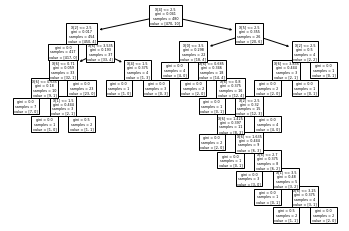

In [54]:
tree.plot_tree(dectree)

In [55]:
import graphviz 

In [56]:
"""da = tree.export_graphviz(dectree, out_file=None)
graph = graphviz.Source(da)
graph.render('c:\\Users\\huyho\\OneDrive\\Desktop\\student-c\\test')"""

"da = tree.export_graphviz(dectree, out_file=None)\ngraph = graphviz.Source(da)\ngraph.render('c:\\Users\\huyho\\OneDrive\\Desktop\\student-c\\test')"

In [57]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import mean

In [58]:
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1) #oversample the minority class to 1:10 ratio
under = RandomUnderSampler(sampling_strategy=0.5) #undersample the majority class to a 1:2 ratio
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [59]:
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [60]:
y_hat = pipeline.predict(xtest)

In [61]:
print(classification_report(ytest, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       159
           1       0.05      0.50      0.08         2

    accuracy                           0.86       161
   macro avg       0.52      0.68      0.50       161
weighted avg       0.98      0.86      0.92       161



In [62]:
from collections import Counter

In [63]:
len(x)

641

In [64]:
over = SMOTE(sampling_strategy=0.1) #oversample the minority class to 1:10 ratio
under = RandomUnderSampler(sampling_strategy=0.3) #undersample the majority class to a 1:2 ratio
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

In [65]:
counter0 = 0
counter1 = 0
for i in y:
    if i == 0:
        counter0 += 1
    elif i == 1:
        counter1 += 1
print("0 classes: ", counter0)
print("1 classes: ", counter1)
    

0 classes:  206
1 classes:  62


array([[3.        , 4.        , 1.        , ..., 3.        , 3.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.8       ],
       [3.        , 3.        , 2.        , ..., 2.        , 2.        ,
        1.75      ],
       ...,
       [4.        , 3.        , 3.        , ..., 2.        , 2.        ,
        3.90134651],
       [4.        , 3.        , 2.47915797, ..., 2.52084203, 2.        ,
        3.88021051],
       [4.        , 3.        , 3.        , ..., 2.        , 2.10133021,
        3.74493349]])

In [69]:
svc = svm.SVC(kernel='linear')
svc.fit(x , y)
score = svc.score(xtrain, ytrain)
print('Score:', score)
ypred = svc.predict(xtest)
ypred

Score: 0.93125


array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [72]:
print("Accuracy: ", metrics.accuracy_score(ytest, ypred))
prediction = svc.predict([[4,4,4,4,4,4,4]])
prediction

Accuracy:  0.8881987577639752


array([1], dtype=int64)